In [2]:
#importing neccssary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import shapiro
import researchpy as rp
import matplotlib.ticker
import matplotlib.image as mpimg



In [3]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats



 ## 1. Changes in Muscle properties

In [3]:
# Loading the data for muscle histology
Overload_muscle_typehist = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV_1.xlsx",sheet_name='type_frq')
Overload_muscle_typehist=Overload_muscle_typehist.dropna() #dropping NaN values



In [4]:
Muscle_raw = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV.xlsx", sheet_name='Muscle_all') # new pd dataframe



In [5]:
Muscle_type_medvslat = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV_1.xlsx", sheet_name='typefinal') # new pddataframe for the sheet containing the labelled fibres (medial vs lateral)



In [6]:
#separatating medial and lateral fibres for analysis
type_med=Muscle_type_medvslat.drop(Muscle_type_medvslat[Muscle_type_medvslat['compartment']=='Lateral'].index)
type_lat=Muscle_type_medvslat.drop(Muscle_type_medvslat[Muscle_type_medvslat['compartment']=='Medial'].index)



 ### Adding another column called Group which specifies overload or control for each animal

In [7]:
# adding column to dataframe to specify Control and overload based on animal names.
Muscle_raw.loc[Muscle_raw['Animal'].str.contains('CT'), 'Group'] = 'Control'

Muscle_raw.loc[Muscle_raw['Animal'].str.contains('OV'), 'Group'] = 'Overload'



In [8]:
#renaming columns for processing
Muscle_raw=Muscle_raw.rename(columns={'Twitch (mN)': 'Twitch','Tetanus (mN)': 'Tetanus',
                                                                 'C:F': 'C_F_Ratio', 'relative weight': 'Relative_weight'})



In [9]:
#creating separate dataframes for different muscle types
Muscle_Type_areas=(Muscle_raw[['Animal','TIArea (%)','TIIaArea (%)','TIIbArea (%)','Group']])
TI_area=(Muscle_Type_areas[['Animal','TIArea (%)','Group']])
TIIa_area=(Muscle_Type_areas[['Animal','TIIaArea (%)','Group']])
TIIb_area=(Muscle_Type_areas[['Animal','TIIbArea (%)','Group']])



In [10]:
#adding labels to fibres and renaming Area column for easier analysis
TI_area['Fibre']='Type I'
TIIa_area['Fibre']='Type IIa'
TIIb_area['Fibre']='Type IIb'

TI_area= TI_area.rename({'TIArea (%)': 'Area'}, axis='columns')
TIIa_area= TIIa_area.rename({'TIIaArea (%)': 'Area'}, axis='columns')
TIIb_area= TIIb_area.rename({'TIIbArea (%)': 'Area'}, axis='columns')



In [11]:
#Joining separated dfs after labelling 
Muscl_type_final=pd.concat([TI_area,TIIa_area,TIIb_area],sort=False, ignore_index=True,axis=0)



In [12]:
#Adding new labels which combine Condition and muscle type grouping variables. 
Muscl_type_final1=Muscl_type_final.drop(Muscl_type_final[Muscl_type_final['Area']==0].index)

Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Control') & (Muscl_type_final1.Fibre == 'Type I'), 'Group1'] = 'TypeI_Con' 
Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Control') & (Muscl_type_final1.Fibre == 'Type IIa'), 'Group1'] = 'TypeIIa_Con' 
Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Control') & (Muscl_type_final1.Fibre == 'Type IIb'), 'Group1'] = 'TypeIIb_Con' 


Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Overload') & (Muscl_type_final1.Fibre == 'Type I'), 'Group1'] = 'TypeI_OL' 
Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Overload') & (Muscl_type_final1.Fibre == 'Type IIa'), 'Group1'] = 'TypeIIa_OL' 
Muscl_type_final1.loc[(Muscl_type_final1.Group == 'Overload') & (Muscl_type_final1.Fibre == 'Type IIb'), 'Group1'] = 'TypeIIb_OL' 



In [13]:
#dropping 0 values. 
Muscle_cap=Muscle_raw.drop(Muscle_raw[Muscle_raw['C_F_Ratio']==0].index)
Muscle_func=Muscle_raw.drop(Muscle_raw[Muscle_raw['Twitch']==0].index)
Muscle_func1=Muscle_raw.drop(Muscle_raw[Muscle_raw['Tetanus']==0].index)


 ### Figure 1. Differnces in muscle histology between medial and lateral fibres and control and overload conditions.

 #### Creating a function to set all Histogram plotting parameters

In [4]:
#Setting Histogram parameters for medial vs lateral and control
def histo_plots_overlay(pl1,pl2,pl3,pl4,Dat,Datsubset,subsetlabel1,subsetlabel2,DV,lab1,lab2,colour1,colour2,edgecol1,edgecol2,LW1,LW2,alpha1,alpha2,YLab,XLab,XLab1,LegLab1,LegLab2,Frameon,ylimL,ylimH):
       pltN=plt.axes([pl1,pl2,pl3,pl4])
       df = Dat[Datsubset == subsetlabel1 ]
       pltN=sns.distplot(df[DV],kde=False, label=lab1, color=colour1,hist_kws=dict(edgecolor=edgecol1, linewidth=LW1,alpha=alpha1))
       df = Dat[Datsubset == subsetlabel2 ]
       pltN=sns.distplot(df[DV],kde=False, label=lab2, color=colour2,hist_kws=dict(edgecolor=edgecol2, linewidth=LW2,alpha=alpha2))
       plt.legend(prop={'size': 13}, )
       plt.ylim((ylimL,ylimH))
       plt.ylabel(YLab)
       pltN.set(xlabel=(XLab))
       pltN.set_xlabel(XLab1)
       pltN.get_legend().set_visible(False)
       sns.despine()


 ####Setting parameters for repetitve 2 condition plots (stripPlots):

In [5]:
def two_cond_stripplot(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    sns.despine()
    pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)



In [16]:
#Plotting Figure 1
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

def two_cond_stripplot(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    sns.despine()
    #pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)

#Plt0 Medial vs lateral frequency histogram for FCSA
histo_plots_overlay(0,0,0.6,0.8,Overload_muscle_typehist,Overload_muscle_typehist.compartment,'Med','Lat','Area','','','black','white',"black","black",1,1,0.9,0.6,'Frequency','','FCSA (\u03BCm$^2$)','Medial','Lateral',False,0,110)

#Plt00 Con vs OL frequency histogram for FCSA

histo_plots_overlay(0.81,0, 0.6, 0.8,Overload_muscle_typehist,Overload_muscle_typehist.condition,'Con','OL','Area','','','midnightblue','darkseagreen',"black","black",1,1,0.9,0.6,'Frequency','','FCSA (\u03BCm$^2$)','Control','Overload',False,0,110)

#PLot 3 control vs overload for FCSA
labels1=['Con', 'OL']
two_cond_stripplot(1.2,0.4,0.2,0.4,"Group","FCSA",12,None,0.7,1,'midnightblue','darkseagreen',Muscle_func2,0,'white',0,6000,'FCSA (\u03BCm$^2$)','','',12,1,False)
labels1=['Med', 'Lat']
#plt4 medial vs lateral grouped
two_cond_stripplot(0.4,0.4,0.2,0.4,"compartment","FCSA",12,None,0.8,1,'dimgrey','white',DFcon,0,'black',0,3000,'FCSA (\u03BCm$^2$)','','',12,1,False)
labels1=['Con', 'OL']
#PLot 5 control vs overload for relative muscle weight
two_cond_stripplot(1.65,0, 0.25, 0.8,"Group","Relative_weight",12,None,0.7,1,'midnightblue','darkseagreen',Muscle_cap,0,'white',0,0.12,'muscle weight (g/g BW)','','',12,1,False)

#PLot 6 control vs overload for each fibre type arial composition entire edl
labels1=['', '']
two_cond_stripplot(0,-1.05, 0.55, 0.8,"Group1","Area",12,None,0.7,1,'midnightblue','darkseagreen',Muscl_type_final1,0,'white',0,100,'Areal composition (%)','','Entire EDL',12,1,False)

#PLot 7 control vs overload for each fibre type arial composition Medial only
labels1=['I','IIa','IIx/b']
two_cond_stripplot(0.7,-1.05, 0.55, 0.8,"fibre","T1Area_perc",12,'condition',0.7,1,'midnightblue','darkseagreen',type_med,0,'white',0,100,'Areal composition (%)','','Medial',12,1,True)
plt.legend([],[],frameon=False)

#PLot 8 control vs overload for each fibre type arial composition Lateral only
two_cond_stripplot(1.4,-1.05, 0.55, 0.8,"fibre","T1Area_perc",12,'condition',0.7,1,'midnightblue','darkseagreen',type_lat,0,'white',0,100,'Areal composition (%)','','Lateral',12,1,True)
plt.legend([],[],frameon=False)

#PLot 9control vs overload for each fibre type arial composition Lateral only
two_cond_stripplot(0,-1.95, 0.55, 0.8,"fibre","T1Area_perc",12,'compartment',0.8,1,'grey','white',Muscle_type_medvslat,0,'black',0,100,'Areal composition (%)','','Medial vs Lateral',12,1,True)
plt.legend([],[],frameon=False)

#plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Muscle_anatomy.png', dpi= 300, bbox_inches = 'tight')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


NameError: name 'Muscle_func2' is not defined

In [116]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.2 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

 ### Running Stats for Muscle histology

 ### Muscle weight

In [117]:
# muscle weight summary statistics
rp.summary_cont(Muscle_raw.groupby("Group")['Relative_weight'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.061498,0.005544,0.002095,0.057062,0.065934
Overload,7,0.087788,0.017223,0.006510,0.074006,0.101569


 #### Creating function for shapiro normlaity testing

In [118]:

def Shap_normality(DF,DV,GroupsandDV):
    alpha = 0.05  
    stat, p = shapiro(DF[DV])
    print(GroupsandDV)
    print('Size=%.3f, p=%.3f' % (stat, p))# interpret
    if p > alpha:
        print('normally distributed:use parametric')
    else:
        print('Not normally distributed: use non-parametric')


 #### Creating function for T tests

In [119]:
def T_Test(DF,DF1,Lab1,Lab2,printDV,MNTYPE):
    alpha = 0.05
    stat, p = stats.ttest_ind(DF,DF1)
    print('T test: ' + Lab1 + ' vs ' + Lab2 +  ' for ' + printDV )
    print('Statistics=%.3f, p=%.15f' % (stat, p))
    if p > alpha:
        print(printDV + ' has the same distribution between ' + Lab1 + ' and ' + Lab2 +  ' in ' + MNTYPE  + '(fail to reject H0)')
    else:
        print(printDV + ' has a different distribution between ' + Lab1 + ' and ' + Lab2  + ' in ' + MNTYPE  + '(reject H0)')
#Test=type T for parametric wilcoxon for no parametric
#DF= dataframe1 specifying group1
#DF1=dataframe specifying group2
#Groupin_Var=column for selecting the categorical variable
#Lab1=condition1 and Lab2= condition2
#PrintDV= the dependent variable in question
#MNTYPE=Mn laterality (medial,lateral,entire edl)


 #### Creating function for MannWHitneyU

In [120]:

def ManWhitney(DF,DF1,Lab1,Lab2,printDV,MNTYPE):
    alpha = 0.05
    stat, p = mannwhitneyu(DF,DF1)
    print('Mann WhitneyU: ' + Lab1 + ' vs ' + Lab2 + ' for '+ printDV )
    print('Statistics=%.3f, p=%.15f' % (stat, p))
    if p > alpha:
        print(printDV + ' has same distribution between ' + Lab1 + ' and ' + Lab2 +  ' in ' + MNTYPE  + '(fail to reject H0)')
    else:
        print(printDV + ' has different distribution between ' + Lab1 + ' and ' + Lab2  + ' in ' + MNTYPE  + '(reject H0)')
#Test=type T for parametric wilcoxon for no parametric
#DF= dataframe1 specifying group1
#DF1=dataframe specifying group2
#Groupin_Var=column for selecting the categorical variable
#Lab1=condition1 and Lab2= condition2
#PrintDV= the dependent variable in question
#MNTYPE=Mn laterality (medial,lateral,entire edl)


 ### Testing for differences between control and overload for muscle weight

In [121]:
Shap_normality(Muscle_raw,'Relative_weight','Control vs Overload for Relative Weight')



Control vs Overload for Relative Weight
Size=0.872, p=0.044
Not normally distributed: use non-parametric


In [122]:
DF=Muscle_raw[Muscle_raw['Group'] == 'Control'].Relative_weight
DF1=Muscle_raw[Muscle_raw['Group'] == 'Overload'].Relative_weight  

ManWhitney(DF,DF1,'Control','Overload','Relative muscle weight','entire muscle')
# compare samples


Mann WhitneyU: Control vs Overload for Relative muscle weight
Statistics=1.000, p=0.001647256938291
Relative muscle weight has different distribution between Control and Overload in entire muscle(reject H0)


In [123]:
rp.summary_cont(Muscle_raw.groupby("Group")['Relative_weight'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.061498,0.005544,0.002095,0.057062,0.065934
Overload,7,0.087788,0.017223,0.006510,0.074006,0.101569


 ### Muscle FCSA

In [124]:
Muscle_func2=Muscle_raw.drop(Muscle_raw[Muscle_raw['FCSA']==0].index)
rp.summary_cont(Muscle_func2.groupby("Group")['FCSA'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,6,1891.107239,253.436106,103.464857,1668.960698,2113.253781
Overload,5,3131.826192,1207.650165,540.077572,1948.329031,4315.323353


 ### Normality test (Shaprio) for FCSA

In [125]:
Shap_normality(Muscle_func2,'FCSA','Control vs Overload for FCSA')


Control vs Overload for FCSA
Size=0.759, p=0.003
Not normally distributed: use non-parametric


 #### ManWhitneyU test for FCSA

In [126]:
DF=Muscle_func1[Muscle_func1['Group'] == 'Control'].FCSA
DF1=Muscle_func1[Muscle_func1['Group'] == 'Overload'].FCSA
ManWhitney(DF,DF1,'Control','Overload', 'FCSA', 'entire edl')


Mann WhitneyU: Control vs Overload for FCSA
Statistics=12.000, p=0.207988289014148
FCSA has same distribution between Control and Overload in entire edl(fail to reject H0)


In [127]:
rp.summary_cont(Muscle_func1.groupby("Group")['FCSA'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,5,1942.707392,245.597245,109.834427,1702.022092,2183.392692
Overload,7,2237.018709,1818.680073,687.396455,781.771568,3692.265849


### Medial vs lateral entire edl FCSA

In [128]:
FCSA_means=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV_1.xlsx",sheet_name='FCSA_Comp')

In [129]:
#FCSA control medial vs lateral
DFcon=FCSA_means.drop(FCSA_means[FCSA_means['condition']=='overload'].index)
DFcon1=DFcon[DFcon['compartment'] == 'medial'].FCSA

DF1con=FCSA_means.drop(FCSA_means[FCSA_means['condition']=='overload'].index)
DF1con1=DF1con[DF1con['compartment'] == 'lateral'].FCSA
ManWhitney(DFcon1,DF1con1,'Medial','Lateral', 'FCSA', 'entire edl')


Mann WhitneyU: Medial vs Lateral for FCSA
Statistics=1.000, p=0.030300984856003
FCSA has different distribution between Medial and Lateral in entire edl(reject H0)


In [172]:
#FCSA overload medial vs lateral
DF=FCSA_means.drop(FCSA_means[FCSA_means['condition']=='control'].index)
DFol1=DF[DF['compartment'] == 'medial'].FCSA

DF1=FCSA_means.drop(FCSA_means[FCSA_means['condition']=='control'].index)
DF1ol1=DF1[DF1['compartment'] == 'lateral'].FCSA
ManWhitney(DFol1,DF1ol1,'Medial','Lateral', 'FCSA', 'entire edl')

Mann WhitneyU: Medial vs Lateral for FCSA
Statistics=4.000, p=0.156160710838108
FCSA has same distribution between Medial and Lateral in entire edl(fail to reject H0)


In [173]:
rp.summary_cont(DF.groupby("compartment")['FCSA'])

,N,Mean,SD,SE,95% Conf.,Interval
compartment,,,,,,
lateral,4,2543.063469,802.571032,401.285516,1634.868850,3451.258087
medial,4,2100.583505,728.045162,364.022581,1276.722847,2924.444162


In [171]:
rp.summary_cont(DF.groupby("compartment")['FCSA'])

KeyError: 'compartment'

In [132]:
rp.summary_cont(Overload_muscle_typehist.groupby("compartment")['Area'])

,N,Mean,SD,SE,95% Conf.,Interval
compartment,,,,,,
Lat,517,2101.106383,1187.263356,52.215783,1998.664327,2203.548439
Med,603,1420.487562,652.177460,26.558719,1368.389255,1472.585869


 ### Stats for Aerial composition: entire EDL

 #### Type 1 muscle fibres area

In [133]:
Muscle_func1=Muscle_func1.rename(columns={'TIArea (%)': 'T1Area', 'TIIaArea (%)': 'T2aArea','TIIbArea (%)': 'T2bArea'}) #renaming labels
# dropping 0 values
Muscle_func3=Muscle_func1.drop(Muscle_func1[Muscle_func1['T1Area']==0].index)



In [134]:
rp.summary_cont(Muscle_func3.groupby("Group")['T1Area'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,4,1.466675,0.491901,0.245950,0.910037,2.023313
Overload,4,2.724644,2.248722,1.124361,0.179975,5.269313


 #### Shapiro wilks for T1 area

In [135]:
Shap_normality(Muscle_func3,'T1Area','Control vs Overload for areal composition')


Control vs Overload for areal composition
Size=0.709, p=0.003
Not normally distributed: use non-parametric


 #### ManWhiteny U T1 area

In [136]:
DF=Muscle_func3[Muscle_func3['Group'] == 'Control'].T1Area
DF1=Muscle_func3[Muscle_func3['Group'] == 'Overload'].T1Area
ManWhitney(DF,DF1,'Control','Overload', 'T1Area', 'entire edl')


Mann WhitneyU: Control vs Overload for T1Area
Statistics=5.000, p=0.235243211029395
T1Area has same distribution between Control and Overload in entire edl(fail to reject H0)


 #### Shapiro WIlks normality test for type 2 area

In [137]:
Shap_normality(Muscle_func3,'T2aArea','Control vs Overload for areal composition')


Control vs Overload for areal composition
Size=0.935, p=0.563
normally distributed:use parametric


 #### T test for type 2 area

In [138]:
DF=Muscle_func3[Muscle_func3['Group'] == 'Control'].T2aArea
DF1=Muscle_func3[Muscle_func3['Group'] == 'Overload'].T2aArea
T_Test(DF,DF1,'Control','Overload', 'T2aArea', 'entire edl')


T test: Control vs Overload for T2aArea
Statistics=-2.841, p=0.029511379003190
T2aArea has a different distribution between Control and Overload in entire edl(reject H0)


In [175]:
rp.summary_cont(Muscle_func3.groupby("Group")['T2aArea'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,4,11.902173,2.288954,1.144477,9.311978,14.492368
Overload,4,18.152674,3.757213,1.878606,13.900988,22.404361


 ### Shapiro wilks normality test for T2b Area

In [139]:
Shap_normality(Muscle_func3,'T2bArea','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.900, p=0.288
normally distributed:use parametric


In [174]:
#Control vs OL
DF=Muscle_func3[Muscle_func3['Group'] == 'Control'].T2bArea
DF1=Muscle_func3[Muscle_func3['Group'] == 'Overload'].T2bArea
T_Test(DF,DF1,'Control','Overload', 'T2bArea', 'entire edl')


T test: Control vs Overload for T2bArea
Statistics=2.359, p=0.056354562104145
T2bArea has the same distribution between Control and Overload in entire edl(fail to reject H0)


In [176]:
rp.summary_cont(Muscle_func3.groupby("Group")['T2bArea'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,4,86.631152,2.52958,1.264790,83.768662,89.493641
Overload,4,79.122682,5.84139,2.920695,72.512527,85.732838


 ### Medial only Type 1 area COntrol vs OL

In [141]:
### creating new df for each fibre type for stats 
T1med = type_med[(type_med['fibre'] == 'T1')]
T2med = type_med[(type_med['fibre'] == 'T2')]
T2bmed = type_med[(type_med['fibre'] == 'T2b')]



In [142]:
Shap_normality(T1med,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.900, p=0.287
normally distributed:use parametric


In [143]:
#T1med Control vs OL
DF=T1med[T1med['condition'] == 'Control'].T1Area_perc
DF1=T1med[T1med['condition'] == 'Overload'].T1Area_perc
T_Test(DF,DF1,'Control','Overload', 'T1Area_perc', 'Medial edl')


T test: Control vs Overload for T1Area_perc
Statistics=-0.696, p=0.512212748240345
T1Area_perc has the same distribution between Control and Overload in Medial edl(fail to reject H0)


 #### stats for T2 med Control vs OL

In [144]:
#T2 med Control vs OL
Shap_normality(T2med,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.930, p=0.514
normally distributed:use parametric


In [145]:
#T1med Control vs OL
DF=T2med[T2med['condition'] == 'Control'].T1Area_perc
DF1=T2med[T2med['condition'] == 'Overload'].T1Area_perc
T_Test(DF,DF1,'Control','Overload', 'T2Area_perc', 'Medial edl')


T test: Control vs Overload for T2Area_perc
Statistics=-0.874, p=0.415942501677959
T2Area_perc has the same distribution between Control and Overload in Medial edl(fail to reject H0)


 #### Type IIb Med, Control vs OL

In [146]:
#T2 med Control vs OL
Shap_normality(T2bmed,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.917, p=0.405
normally distributed:use parametric


In [147]:
#T1med Control vs OL
DF=T2bmed[T2bmed['condition'] == 'Control'].T1Area_perc
DF1=T2bmed[T2bmed['condition'] == 'Overload'].T1Area_perc
T_Test(DF,DF1,'Control','Overload', 'T2bArea_perc', 'Medial edl')


T test: Control vs Overload for T2bArea_perc
Statistics=0.849, p=0.428459922256168
T2bArea_perc has the same distribution between Control and Overload in Medial edl(fail to reject H0)


 ### Lateral only fibre type composisiton control vs overload

In [148]:
### creating new df for each fibre type for stats 
T1lat = type_lat[(type_lat['fibre'] == 'T1')]
T2lat = type_lat[(type_lat['fibre'] == 'T2')]
T2blat = type_lat[(type_lat['fibre'] == 'T2b')]


 #### T2a Lat testing normality with Shapiro

In [149]:
#T2 med Control vs OL
Shap_normality(T2lat,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.693, p=0.002
Not normally distributed: use non-parametric


In [150]:
#T1med Control vs OL
DF=T2lat[T2lat['condition'] == 'Control'].T1Area_perc
DF1=T2lat[T2lat['condition'] == 'Overload'].T1Area_perc
ManWhitney(DF,DF1,'Control','Overload', 'T1Area_perc', 'LAteral  edl')


Mann WhitneyU: Control vs Overload for T1Area_perc
Statistics=4.000, p=0.156160710838108
T1Area_perc has same distribution between Control and Overload in LAteral  edl(fail to reject H0)


In [178]:
rp.summary_cont(T2lat.groupby("condition")['T1Area_perc'])


,N,Mean,SD,SE,95% Conf.,Interval
condition,,,,,,
Control,4,7.264860,1.591460,0.795730,5.463954,9.065766
Overload,4,12.039336,7.938657,3.969328,3.055901,21.022772


 #### Lateral only Type 2b/x Shapiro wilks test for normality

In [151]:
#T2 med Control vs OL
Shap_normality(T2blat,'T1Area_perc','Control vs Overload for areal composition')


Control vs Overload for areal composition
Size=0.667, p=0.001
Not normally distributed: use non-parametric


 #### ManwhitneyU for type 2b/x control vs overload aerial composition

In [152]:
#T1med Control vs OL
DF=T2blat[T2blat['condition'] == 'Control'].T1Area_perc
DF1=T2blat[T2blat['condition'] == 'Overload'].T1Area_perc
ManWhitney(DF,DF1,'Control','Overload', 'T1Area_perc', 'LAteral  edl')


Mann WhitneyU: Control vs Overload for T1Area_perc
Statistics=3.000, p=0.096965426141205
T1Area_perc has same distribution between Control and Overload in LAteral  edl(fail to reject H0)


In [179]:
rp.summary_cont(T2blat.groupby("condition")['T1Area_perc'])


,N,Mean,SD,SE,95% Conf.,Interval
condition,,,,,,
Control,4,93.170473,1.043539,0.521769,91.989598,94.351348
Overload,4,87.960664,7.938657,3.969328,78.977228,96.944099


 #### Medial vs lateral for aerial composition

In [153]:
### creating new df for each fibre type for stats 
#T1= Muscle_type_medvslat[(Muscle_type_medvslat'fibre'] == 'T1')]
T2 = Muscle_type_medvslat[(Muscle_type_medvslat['fibre'] == 'T2')]
T2b= Muscle_type_medvslat[(Muscle_type_medvslat['fibre'] == 'T2b')]


 #### type 2 medial vs lateral

In [154]:
#T2 medial vs lateral
Shap_normality(T2,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.867, p=0.024
Not normally distributed: use non-parametric


In [155]:
#T1med Control vs OL
DF=T2[T2['compartment'] == 'Medial'].T1Area_perc
DF1=T2[T2['compartment'] == 'Lateral'].T1Area_perc
ManWhitney(DF,DF1,'Medial','Lateral', 'T1Area_perc', 'medial vs lateral')


Mann WhitneyU: Medial vs Lateral for T1Area_perc
Statistics=10.000, p=0.011974337439880
T1Area_perc has different distribution between Medial and Lateral in medial vs lateral(reject H0)


 #### type 2b/x medial vs lateral

In [156]:
#T2 medial vs lateral
Shap_normality(T2b,'T1Area_perc','Control vs Overload for areal composition')



Control vs Overload for areal composition
Size=0.864, p=0.022
Not normally distributed: use non-parametric


In [157]:
#T1med Control vs OL
DF=T2b[T2b['compartment'] == 'Medial'].T1Area_perc
DF1=T2b[T2b['compartment'] == 'Lateral'].T1Area_perc
ManWhitney(DF,DF1,'Medial','Lateral', 'T1Area_perc', 'medial vs lateral')

Mann WhitneyU: Medial vs Lateral for T1Area_perc
Statistics=3.000, p=0.001380802208914
T1Area_perc has different distribution between Medial and Lateral in medial vs lateral(reject H0)


In [158]:
### Muscle Physiology-force generation
Twitch_traces=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Twitch_Data')
Tetanus_traces=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Tetanus_Data')


In [159]:
Twitch_traces=Twitch_traces.dropna()
Twitch_traces_PKnorm=Twitch_traces[(Twitch_traces['norm'] == 'peak')]
Twitch_traces_Massnorm=Twitch_traces[(Twitch_traces['norm'] == 'mass')]
Tetanus_traces=Tetanus_traces.dropna()

In [160]:
Twitch_traces_PKnorm['time_norm']=Twitch_traces_PKnorm['time']*1000
Tetanus_traces['time_norm']=Tetanus_traces['time']*1000

In [161]:
Angio_Dat=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Capillary Figure Data')

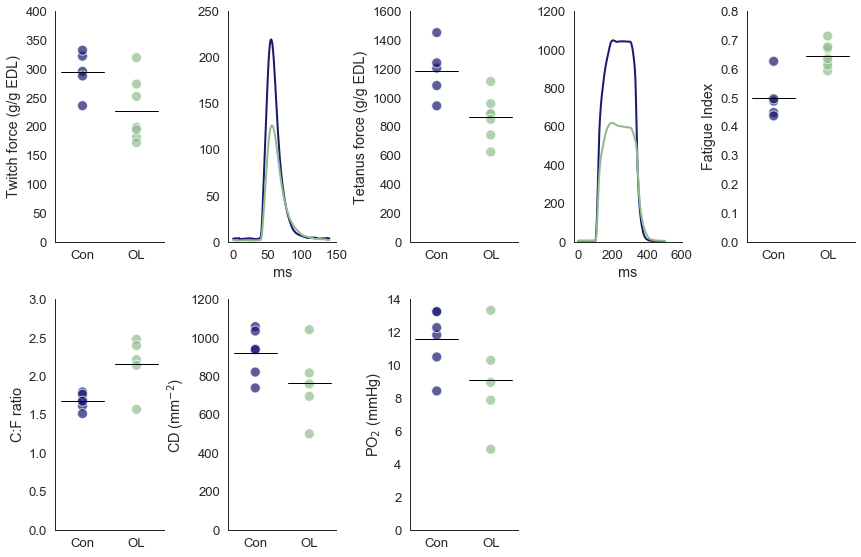

In [162]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

#PLot 1 control vs overload for twitch force
labels1=['Con', 'OL']
two_cond_stripplot(0,0, 0.25, 0.8,"Group","Twitch",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,400,'Twitch force (g/g EDL)','','',12,1,False)

#Plt1a Twitch trace
plt1a=plt.axes([0.40,0, 0.25, 0.8])
plt1a=sns.lineplot(y='Twitch_Force',x='time_norm', hue= 'group',data=Twitch_traces_PKnorm,legend=False,palette=['midnightblue','darkseagreen'],linewidth=2)
plt.ylim((0,250))
x_ticks = np.arange(0,200,50)
plt1a.set(ylabel=(''))
plt1a.set(xlabel=('ms'))
plt.xticks(x_ticks)

#PLot 2 control vs overload for tetanus force
two_cond_stripplot(0.82,0, 0.25, 0.8,"Group","Tetanus",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,1600,'Tetanus force (g/g EDL)','','',12,1,False)

#Plt1a Tetatus trace
plt1a=plt.axes([1.2,0, 0.25, 0.8])
plt1a=sns.lineplot(y='Tetanus_force',x='time_norm', hue= 'group',data=Tetanus_traces,legend=False,palette=['midnightblue','darkseagreen'],linewidth=2)
plt.ylim((0,1200))
x_ticks = np.arange(0,620,200)
plt1a.set(ylabel=(''))
plt1a.set(xlabel=('ms'))
plt.xticks(x_ticks)
#PLot 3 control vs overload for fatigue index
two_cond_stripplot(1.6,0, 0.25, 0.8,"Group","FI",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,0.8,'Fatigue Index','','',12,1,False)

#C:F 
two_cond_stripplot(0,-1, 0.25, 0.8,"group","C_F",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,3,'C:F ratio','','',12,1,False)
#Cap density
two_cond_stripplot(0.40,-1, 0.25, 0.8,"group","CD",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,1200,'CD (mm$^{-2}$)','','',12,1,False)
#PO2
two_cond_stripplot(0.82,-1, 0.25, 0.8,"group","PO2",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,14,'PO$_2$ (mmHg)','','',12,1,False)

plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Muscle_Func.png', dpi= 300, bbox_inches = 'tight')


### Angiogenesis data 


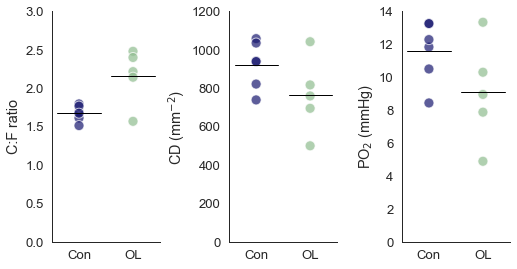

In [744]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

def two_cond_stripplot(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    sns.despine()
    #pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)



plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Angio_Nov20.png', dpi= 300, bbox_inches = 'tight')


#### Angiogenesis Stats

In [389]:
#T2 medial vs lateral
Shap_normality(Angio_Dat,'C_F','Control vs Overload for C:F')
Shap_normality(Angio_Dat,'CD','Control vs Overload for CD')
Shap_normality(Angio_Dat,'PO2','Control vs Overload for PO2')

Control vs Overload for C:F
Size=0.873, p=0.084
normally distributed:use parametric
Control vs Overload for CD
Size=0.934, p=0.456
normally distributed:use parametric
Control vs Overload for PO2
Size=0.916, p=0.284
normally distributed:use parametric


#### cap fibre t test

In [396]:
DF=Angio_Dat[Angio_Dat['group'] == 'control'].C_F
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].C_F
T_Test(DF,DF1,'control','overload', 'C:F', 'controlvs ol')

T test: control vs overload for C:F
Statistics=-3.200, p=0.010823296599386
C:F has a different distribution between control and overload in controlvs ol(reject H0)


In [118]:
rp.summary_cont(Angio_Dat.groupby("group")['C_F'])

,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,1.671531,0.103082,0.042083,1.581176,1.761887
overload,5,2.157648,0.358171,0.160179,1.806641,2.508656


In [397]:
#### CD TTest
DF=Angio_Dat[Angio_Dat['group'] == 'control'].CD
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].CD
T_Test(DF,DF1,'control','overload', 'CD', 'controlvs ol')

T test: control vs overload for CD
Statistics=1.647, p=0.133981370753141
CD has the same distribution between control and overload in controlvs ol(fail to reject H0)


In [119]:
rp.summary_cont(Angio_Dat.groupby("group")['CD'])

,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,920.758613,122.979488,50.206166,812.962339,1028.554887
overload,5,761.262547,196.591629,87.918449,568.602751,953.922344


In [398]:
####PO2
DF=Angio_Dat[Angio_Dat['group'] == 'control'].PO2
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].PO2
T_Test(DF,DF1,'control','overload', 'PO2', 'controlvs ol')

T test: control vs overload for PO2
Statistics=1.672, p=0.128934623835821
PO2 has the same distribution between control and overload in controlvs ol(fail to reject H0)


In [120]:
rp.summary_cont(Angio_Dat.groupby("group")['PO2'])

,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,11.578374,1.857304,0.758241,9.950376,13.206373
overload,5,9.056003,3.108060,1.389967,6.010104,12.101902


In [51]:
#T1med Control vs OL
DF=T2b[T2b['compartment'] == 'Medial'].T1Area_perc
DF1=T2b[T2b['compartment'] == 'Lateral'].T1Area_perc
ManWhitney(DF,DF1,'Medial','Lateral', 'T1Area_perc', 'medial vs lateral')



Mann WhitneyU: Medial vs Lateral for T1Area_perc
Statistics=3.000, p=0.001380802208914
T1Area_perc has different distribution between Medial and Lateral in medial vs lateral(reject H0)


 ### Running Stats for muscle data

 ### Stats for effect of overload on Twitch force

In [54]:
rp.summary_cont(Muscle_func1.groupby("Group")['FI'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,5,0.498484,0.075448,0.033741,0.424546,0.572423
Overload,7,0.645812,0.042004,0.015876,0.612202,0.679423


 #### Shapiro wilks twitch force control vs overload

In [55]:

#twitch force control vs overload
Shap_normality(Muscle_func,'Twitch','Control vs Overload for twitch force')



Control vs Overload for twitch force
Size=0.916, p=0.190
normally distributed:use parametric


In [56]:
DF=Muscle_func[Muscle_func['Group'] == 'Control'].Twitch
DF1=Muscle_func[Muscle_func['Group'] == 'Overload'].Twitch                      
T_Test(DF,DF1,'Control','Overload','Twitch force', 'entire EDL')


T test: Control vs Overload for Twitch force
Statistics=2.758, p=0.017336355933783
Twitch force has a different distribution between Control and Overload in entire EDL(reject H0)


In [241]:
rp.summary_cont(Muscle_func.groupby("Group")['Twitch'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,296.002302,36.270311,13.708889,266.980008,325.024595
Overload,7,227.078153,55.276560,20.892576,182.847692,271.308613


In [181]:
rp.summary_cont(Muscle_func1.groupby("Group")['Tetanus'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,5,1184.213125,189.443581,84.721745,998.558416,1369.867834
Overload,7,864.101786,155.516334,58.779649,739.662802,988.540770


 #### Shapiro wilks tetanic force control vs overload

In [57]:
#twitch force control vs overload
Shap_normality(Muscle_func1,'Tetanus','Control vs Overload for twitch force')



Control vs Overload for twitch force
Size=0.980, p=0.984
normally distributed:use parametric


In [58]:
DF=Muscle_func1[Muscle_func1['Group'] == 'Control'].Tetanus
DF1=Muscle_func1[Muscle_func1['Group'] == 'Overload'].Tetanus                    
T_Test(DF.dropna(),DF1.dropna(),'Control','Overload','Tetanus force', 'entire EDL')


T test: Control vs Overload for Tetanus force
Statistics=3.218, p=0.009210992694549
Tetanus force has a different distribution between Control and Overload in entire EDL(reject H0)


 ### Stats for effect of overload on Fatigue index

In [59]:
#twitch force control vs overload
Shap_normality(Muscle_raw,'FI','Control vs Overload for twitch force')



Control vs Overload for twitch force
Size=0.943, p=0.464
normally distributed:use parametric


In [60]:
stat, p = stats.ttest_ind(Muscle_raw[Muscle_raw['Group'] == 'Control'].FI,
                          Muscle_raw[Muscle_raw['Group'] == 'Overload'].FI)
                         
DF=Muscle_raw[Muscle_raw['Group'] == 'Control'].FI
DF1=Muscle_raw[Muscle_raw['Group'] == 'Overload'].FI                  
T_Test(DF.dropna(),DF1.dropna(),'Control','Overload','FI', 'entire EDL')


T test: Control vs Overload for FI
Statistics=-4.865, p=0.000388218876889
FI has a different distribution between Control and Overload in entire EDL(reject H0)


In [182]:
rp.summary_cont(Muscle_raw.groupby("Group")['FI'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.506237,0.063223,0.023896,0.455648,0.556826
Overload,7,0.645812,0.042004,0.015876,0.612202,0.679423


 ## 2. Assessing the size of EDL Mns in the control and overload groups

 ### Loading Cell SIze data
 this comprises all CTB and FB positive cells from Kv2.1 and SK3 staining
 Cell size was calcualted using cross section ara of a single optical slice through the middle of the cell

In [1]:
Overload_Size2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\\Overload_Python_Analysis1\All_CSA_Data_Fast_Blue.xlsx", sheet_name='Sheet1')
#vals_to_replace = {'CONTROL':'Control', 'OVERLOAD':'Overload'}
#Overload_Size3['Condition'] = Overload_Size2['Condition'].map(vals_to_replace)
#Overload_Size3
Overload_Size2=Overload_Size2.drop(Overload_Size2[Overload_Size2['Size']>4000].index) #dropping cells too small to be alphas

NameError: name 'pd' is not defined

 ### Adding 'Group' column for plotting and stats

In [185]:
Overload_Size2.loc[(Overload_Size2.Compartment == 'LATERAL') & (Overload_Size2.Condition == 'Control'), 'Group'] = 'Lateral_Con'  
Overload_Size2.loc[(Overload_Size2.Compartment == 'MEDIAL') & (Overload_Size2.Condition == 'Control'), 'Group'] = 'Medial_Con'  

Overload_Size2.loc[(Overload_Size2.Compartment == 'LATERAL') & (Overload_Size2.Condition == 'Overload'), 'Group'] = 'Lateral_OL'  
Overload_Size2.loc[(Overload_Size2.Compartment == 'MEDIAL') & (Overload_Size2.Condition == 'Overload'), 'Group'] = 'Medial_OL'  


 ### Calculating animal means from all cells

In [186]:
Overload_Size2_grouped=Overload_Size2.groupby(['Animal #', 'Condition','Compartment','Group'],as_index=False).mean()


 ### Creating Df by Animal and condition for stats and plotting Control vs OL only

In [187]:
Overload_Size2_grouped1=Overload_Size2.groupby(['Animal #', 'Condition'],as_index=False).mean()



In [188]:
latonly=Overload_Size2.loc[(Overload_Size2.Compartment == 'LATERAL')]
latonly_grouped=latonly.groupby(['Animal #', 'Condition'],as_index=False).mean()

Medonly=Overload_Size2.loc[(Overload_Size2.Compartment == 'MEDIAL')]
Medonly_grouped=Medonly.groupby(['Animal #', 'Condition'],as_index=False).mean()


 ### Separating Control(lateral), Control (medial), overload(lateral), overload(medial) so that ne DF with individual groups can be made

 1 separate groups
 2 Add specific label
 3 concat new dfs

In [189]:
Overload_Size2=Overload_Size2.drop(Overload_Size2[Overload_Size2['Size']<450].index) #dropping cells too small to be alphas


 ### Creating Mn Size figure

In [12]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

plt0 = plt.axes([0,0, 0.5, 0.8])
df = Overload_Size2[Overload_Size2.Compartment == 'MEDIAL' ]
plt0=sns.distplot(df['Size'],kde=False, label='MEDIAL', color='black',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.8))
df = Overload_Size2[Overload_Size2.Compartment == 'LATERAL' ]
plt0=sns.distplot(df['Size'],kde=False, label='LATERAL', color='white',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.6))
plt.legend(prop={'size': 13}, )
plt.ylabel('Frequency')
plt0.set(xlabel=('Motoneuron CSA (\u03BCm$^2$)'))
plt0.legend('',frameon=False)
sns.despine()


plt1 = plt.axes([0.66,0, 0.5, 0.8])
df = Overload_Size2[Overload_Size2.Condition == 'Control']
plt1=sns.distplot(df['Size'],kde=False, label='Control', color='midnightblue',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.8))
df = Overload_Size2[Overload_Size2.Condition == 'Overload']
plt1=sns.distplot(df['Size'],kde=False, label='Overload', color='darkseagreen',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.6))
plt.legend(prop={'size': 13}, )
plt.ylabel('')
plt1.set(xlabel=('Motoneuron CSA (\u03BCm$^2$)'))
plt1.legend('',frameon=False)
sns.despine()

labels1=['OL', 'Con']
#Plt3 COntrol vs overload for MN CSA All EDL MNs
#labels1=['Control', 'Overload']
two_cond_stripplot(0.35,-0.85, 0.2, 0.6,'Condition','Size',10,None,0.8,1,'darkseagreen','midnightblue',Overload_Size2_grouped1,0,'white',0,2500,'','','Entire EDL',12,1,False)

def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.invert_xaxis() 
    sns.despine()
    

#Plt3 COntrol vs overload for MN CSA Lateral MNs only
labels1=['OL', 'Con']
two_cond_stripplot(1.05,-0.85, 0.2, 0.6,'Condition','Size',10,None,0.8,1,'darkseagreen','midnightblue',latonly_grouped,0,'white',0,2500,'','','Lateral',12,1,False)


#Plt5 COntrol vs overload for MN CSA Medial MNs only
labels1=['OL', 'Con']
two_cond_stripplot(0.7,-0.85, 0.2, 0.6,'Condition','Size',10,None,0.8,1,'darkseagreen','midnightblue',Medonly_grouped,0,'white',0,2500,'','','Medial',12,1,False)

# Plt6 Medial vs lateral for MN CSA area
labels1=['Lat', 'Med']
two_cond_stripplot(0,-0.85, 0.2, 0.6,'Compartment','Size',10,None,0.7,1,'white','grey',Overload_Size2_grouped,0,'Black',0,2500,'Motoneuron CSA (\u03BCm$^2$)','','Lateral vs Medial',12,1,False)

#def two_cond_stripplot(pltn,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
# Plt1a Medial vs lateral for MN CSA area -small insert graph on histogram 1 (medial vs lateral MNCSA)
labels1=['Lat', 'Med']
two_cond_stripplot2(1,0.38,0.4,0.18,0.6,'Compartment','Size',6,None,0.7,1,'white','grey',Overload_Size2,0.22,'Black',0,4100,'MN CSA (\u03BCm$^2$)','','',12,1,False)

# Plt2a Medial vs lateral for MN CSA area -small insert graph on histogram 1 (medial vs lateral MNCSA)
labels1=['Con','OL']


plt2=plt.axes([1.05,0.4, 0.18, 0.6])
plt2=sns.stripplot(x='Condition', y='Size',s=6,alpha=0.9,linewidth=1, palette=['midnightblue','darkseagreen'],
                   data=Overload_Size2,
                   jitter=0.22, edgecolor='white',zorder=0)
plt2=sns.boxplot(x='Condition', y='Size',data=Overload_Size2, medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
plt.ylim(0,4100)
plt2.set(ylabel=(''))
plt2.set(xlabel='')
labels1=['Con', 'OL']
sns.despine()
plt2.set_xticklabels(labels1)
#pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)

#, (1, 0.5, 'p < 0.001', fontsize=15)


plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Mn_size.png', dpi= 300, bbox_inches = 'tight')



NameError: name 'Overload_Size2' is not defined

 ## Running stats for Cell size

 ### Stats based on animal number

 ### Cell size: oneway ANOVA between groups

 ### testing normality

In [190]:
#importing stats test
from scipy.stats import shapiro
#performing test
alpha = 0.05
stat, p = shapiro(Size_Separate_groups_grouped.Size)
print('Size=%.3f, p=%.3f' % (stat, p))# interpret
if p > alpha:
	print('normally distributed:use parametric')
else:
	print('Not normally distributed: use non-parametric')



NameError: name 'Size_Separate_groups_grouped' is not defined

In [191]:
from scipy import stats
f_value, p_value = stats.f_oneway(Overload_Size2_grouped[Overload_Size2_grouped['Group'] == 'Medial_Con'].Size,
                                 Overload_Size2_grouped[Overload_Size2_grouped['Group'] == 'Lateral_Con'].Size,
                                 Overload_Size2_grouped[Overload_Size2_grouped['Group'] == 'Medial_OL'].Size,
                                 Overload_Size2_grouped[Overload_Size2_grouped['Group'] == 'Lateral_OL'].Size)
print('p=', p_value)
print('f=', f_value)



p= 0.0016375249888539742
f= 7.687904582617584


In [192]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(Overload_Size2_grouped['Size'], Overload_Size2_grouped['Group'])
result = mc.tukeyhsd()

print(result)



        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1     group2    meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------
Lateral_Con Lateral_OL -409.7907  0.048   -816.581   -3.0005   True
Lateral_Con Medial_Con -181.6016 0.5559  -569.4609  206.2577  False
Lateral_Con  Medial_OL -652.2841 0.0013 -1059.0743 -245.4938   True
 Lateral_OL Medial_Con  228.1891 0.4124  -178.6011  634.9794  False
 Lateral_OL  Medial_OL -242.4933 0.3976  -667.3719  182.3852  False
 Medial_Con  Medial_OL -470.6824 0.0202  -877.4727  -63.8922   True
-------------------------------------------------------------------


In [193]:
mc = MultiComparison(Overload_Size2_grouped['Size'], Overload_Size2_grouped['Group'])
result = mc.tukeyhsd()



In [194]:
rp.summary_cont(Overload_Size2_grouped.groupby("Group")['Size'])

#found on https://pythonfordatascience.org/independent-t-test-python/



,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Lateral_Con,6,1868.390516,223.278536,91.153081,1672.678250,2064.102781
Lateral_OL,5,1458.599775,170.880009,76.419863,1291.137365,1626.062184
Medial_Con,6,1686.788894,329.083751,134.347879,1398.334268,1975.243520
Medial_OL,5,1216.106465,165.407225,73.972360,1054.007385,1378.205545


In [195]:
Control1 = Overload_Size2[(Overload_Size2['Condition'] == 'Control')]
Control1.reset_index(inplace= True)

Overload1 = Overload_Size2[(Overload_Size2['Condition'] == 'Overload')]
Overload1.reset_index(inplace= True)



 ### Cell size medial vs lateral for control

 ### testing control size lateral vs medial for normality

 No difference between medial and lateral size in controls

 ### T Test for CONTROL Cell size medial vs lateral

 ### Testing Cell size statistical differences between Control and Overload for 1. Medial MNs only, 2. Lateral MNs only and 3.Entire EDL

 ### Performing Shapiro-Wilks normality tests for Control and Overload Cell Size data in  1. medial only, 2.Lateral only and 3.Entire EDL MN populations

 Results show that all are normally distributed so parametric (T tests) can be performed for all.

In [196]:
Lat_Con_vs_OL=Overload_Size2_grouped.drop(Overload_Size2_grouped[Overload_Size2_grouped['Compartment']=='LATERAL'].index)
Med_Con_vs_OL=Overload_Size2_grouped.drop(Overload_Size2_grouped[Overload_Size2_grouped['Compartment']=='MEDIAL'].index)
Shap_normality(Med_Con_vs_OL,'Size','Medial EDL Control vs OL')
Shap_normality(Lat_Con_vs_OL,'Size','Lateral EDL Control vs OL')
Shap_normality(Overload_Size2_grouped,'Size','Entire EDL Control vs OL')


Medial EDL Control vs OL
Size=0.958, p=0.742
normally distributed:use parametric
Lateral EDL Control vs OL
Size=0.939, p=0.508
normally distributed:use parametric
Entire EDL Control vs OL
Size=0.972, p=0.765
normally distributed:use parametric


 ### Performing T tests, Control vs Overload for Cell Size data in  1. medial only, 2.Lateral only and 3.Entire EDL MN populations

In [197]:
# TTest for cell size Control vs overload overall
alpha = 0.05
#Medial only
DF= Med_Con_vs_OL[(Med_Con_vs_OL['Condition'] == 'Control')].Size
DF1=Med_Con_vs_OL[(Med_Con_vs_OL['Condition'] == 'Overload')].Size
T_Test(DF,DF1,'Control','Overload','Cell size has ', 'Medial MNs')
    #Lateral Only
DF= Lat_Con_vs_OL[(Lat_Con_vs_OL['Condition'] == 'Control')].Size
DF1=Lat_Con_vs_OL[(Lat_Con_vs_OL['Condition'] == 'Overload')].Size
T_Test(DF,DF1,'Control','Overload','Cell size has ', 'Lateral MNs')
#Entire EDL
DF= Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Control')].Size
DF1=Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Overload')].Size
T_Test(DF,DF1,'Control','Overload','Cell size has ','Entire EDL')


T test: Control vs Overload for Cell size has 
Statistics=3.356, p=0.008448269468245
Cell size has  has a different distribution between Control and Overload in Medial MNs(reject H0)
T test: Control vs Overload for Cell size has 
Statistics=2.890, p=0.017874136629664
Cell size has  has a different distribution between Control and Overload in Lateral MNs(reject H0)
T test: Control vs Overload for Cell size has 
Statistics=2.780, p=0.021398473882897
Cell size has  has a different distribution between Control and Overload in Entire EDL(reject H0)


In [198]:
Med=Med_Con_vs_OL[(Med_Con_vs_OL['Condition'] == 'Control')].Size



In [199]:
rp.summary_cont(Overload_Size2.groupby("Condition")['Size'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
Control,285,1790.561653,699.904343,41.458755,1709.159556,1871.963749
Overload,260,1378.271777,500.394472,31.033148,1317.329497,1439.214056


In [200]:
rp.summary_cont(Overload_Size2_grouped1.groupby("Condition")['Size'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
Control,6,1749.421709,248.643286,101.508197,1531.476259,1967.367158
Overload,5,1372.717577,188.119516,84.129605,1188.360452,1557.074702


In [145]:
#Entire EDL
DF= Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Control')].Size
DF1=Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Overload')].Size
T_Test(DF,DF1,'Condition','Control','Overload','Cell size has ')

T test: Condition vs Control for Overload
Statistics=2.780, p=0.021398473882897
Overload has a different distribution between Condition and Control in Cell size has (reject H0)


 #### Summary tables for Cell size
 Tip: '#' comments out table-move them to view differnt tables

In [ ]:
#rp.summary_cont(MED_Con_vs_OL.groupby("Condition")['Size'])
#rp.summary_cont(Lat_Con_vs_OL.groupby("Condition")['Size'])
rp.summary_cont(Overload_Size2_grouped.groupby("Condition")['Size'])


 ### Testing Cell size statistical differences for significance in  Medial vs Lateral MNs


 ### Performing Shapiro-Wilks normality tests for Medial and Lateral Cell Size data
 Normally distributed so parametric (T tests) can be performed

In [ ]:
alpha=0.05
Shap_normality(Overload_Size2_grouped,'Medial EDL Control vs OL')


 ### Testing differences (T tests) between Medial and Lateral MNs (both conditions combined)

In [156]:
df=Overload_Size2_grouped[Overload_Size2_grouped['Compartment'] == 'MEDIAL'].Size
df1=Overload_Size2_grouped[Overload_Size2_grouped['Compartment'] == 'LATERAL'].Size

T_Test(df,df1,'MEDIAL','LATERAL','Cell size has ', ' MNs-con and OL combined')


T test: MEDIAL vs LATERAL for Cell size has 
Statistics=-1.522, p=0.143608722074618
Cell size has  has the same distribution between MEDIAL and LATERAL in  MNs-con and OL combined(fail to reject H0)


In [155]:
rp.summary_cont(Overload_Size2_grouped.groupby("Compartment")['Size'])

,N,Mean,SD,SE,95% Conf.,Interval
Compartment,,,,,,
LATERAL,11,1682.121997,287.063254,86.552828,1504.198349,1860.045645
MEDIAL,11,1472.842335,354.277305,106.818627,1253.258986,1692.425684


In [161]:
rp.summary_cont(Overload_Size2.groupby("Compartment")['Size'])

,N,Mean,SD,SE,95% Conf.,Interval
Compartment,,,,,,
LATERAL,330,1680.330337,664.050969,36.554803,1608.574120,1752.086555
MEDIAL,215,1461.170798,594.977955,40.577160,1381.453961,1540.887635


 ## C bouton Data

 ### Loading C bouton Data

In [202]:
Overload_CBouton2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\VAChT Data July27.xlsx", sheet_name='Medial')


In [90]:
Overload_CBouton2.head()

,Condition,Animal #,Cell #,VAChT Area (Average per Cell),VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,VAChT Number/A1,Compartment
0,OVERLOAD,Leeds 1,1,29.22,1198.18,7913.350098,15.141248,9.92,41,0.005181,LATERAL
1,OVERLOAD,Leeds 1,2,22.39,514.90,5234.149902,9.837319,7.93,23,0.004394,LATERAL
2,OVERLOAD,Leeds 1,3,19.44,330.55,9506.080078,3.477248,6.20,17,0.001788,LATERAL
3,OVERLOAD,Leeds 1,4,27.95,614.80,5524.939941,11.127723,10.88,22,0.003982,LATERAL
4,OVERLOAD,Leeds 1,5,15.30,321.34,7180.660156,4.475076,4.21,21,0.002925,LATERAL


 ### Cleaning data
 eg removing invalid cells etc. No cboutons or very low Vacht immunoreactivity

In [203]:
#Overload_CBouton3=Overload_CBouton2.drop(Overload_CBouton2[Overload_CBouton2['VAChT Area (Average per Cell)']<=3].index)
Overload_CBouton3=Overload_CBouton2.drop(Overload_CBouton2[Overload_CBouton2['VAChT Number']<=1].index)
Overload_CBouton3['Vacht_den']=Overload_CBouton3['VAChT Number/A1']*1000


In [204]:
Overload_CBouton3=Overload_CBouton3.drop(Overload_CBouton3[Overload_CBouton3['Vacht_den']<=0.05].index)

In [116]:
Overload_CBouton3.head()

,Condition,Animal #,Cell #,VAChT Area (Average per Cell),VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,VAChT Number/A1,Compartment,Vacht_den
0,OVERLOAD,Leeds 1,1,29.22,1198.18,7913.350098,15.141248,9.92,41,0.005181,LATERAL,5.181118
1,OVERLOAD,Leeds 1,2,22.39,514.90,5234.149902,9.837319,7.93,23,0.004394,LATERAL,4.394219
2,OVERLOAD,Leeds 1,3,19.44,330.55,9506.080078,3.477248,6.20,17,0.001788,LATERAL,1.788329
3,OVERLOAD,Leeds 1,4,27.95,614.80,5524.939941,11.127723,10.88,22,0.003982,LATERAL,3.981944
4,OVERLOAD,Leeds 1,5,15.30,321.34,7180.660156,4.475076,4.21,21,0.002925,LATERAL,2.924522


 ### Adding extra labels to C bouton DF to group compartment and condition

In [205]:
#adding column: Group and labelling all lateral control Mns
Overload_CBouton3.loc[(Overload_CBouton3.Compartment == 'LATERAL') & (Overload_CBouton3.Condition == 'CONTROL'), 'Group'] = 'Lateral_Con'  
#adding column: Group and labelling all medial control Mns
Overload_CBouton3.loc[(Overload_CBouton3.Compartment == 'MEDIAL') & (Overload_CBouton3.Condition == 'CONTROL'), 'Group'] = 'Medial_Con'  

#adding column: Group and labelling all lateral overload Mns
Overload_CBouton3.loc[(Overload_CBouton3.Compartment == 'LATERAL') & (Overload_CBouton3.Condition == 'OVERLOAD'), 'Group'] = 'Lateral_OL'  
#adding column: Group and labelling all medial overload Mns
Overload_CBouton3.loc[(Overload_CBouton3.Compartment == 'MEDIAL') & (Overload_CBouton3.Condition == 'OVERLOAD'), 'Group'] = 'Medial_OL'  


 ### Calculating animal means for the C bouton data

In [206]:
Overload_CBouton3_grouped=Overload_CBouton3.groupby(['Animal #', 'Condition', 'Compartment','Group'],as_index=False).mean()


 #### Producing graph of animal means by Animal and condition for Control vs OL for entire EDL

In [207]:
OL_Cbouton_grouped2=Overload_CBouton3.groupby(['Animal #', 'Condition'],as_index=False).mean()



In [209]:
Overload_CBouton3_grouped=Overload_CBouton3_grouped.rename(columns={'VAChT Area (Average per Cell)': 'VACHT_Area', 'VAChT Number/A1': 'Vacht_density', 'VAChT Number':'VAChT_Number'})
Overload_CBouton3_grouped['area_100'] = Overload_CBouton3_grouped['VACHT_Area']*100



In [210]:
Overload_CBouton3_grouped['density_100'] = Overload_CBouton3_grouped['Vacht_density']*1000



In [211]:
OL_Cbouton_grouped2=OL_Cbouton_grouped2.rename(columns={'VAChT Area (Average per Cell)': 'VACHT_Area', 'VAChT Number/A1': 'Vacht_density','VAChT Number':'VAChT_Number'})
OL_Cbouton_grouped2['area_100'] = OL_Cbouton_grouped2['VACHT_Area']*100



In [212]:
OL_Cbouton_grouped2['density_100'] = OL_Cbouton_grouped2['Vacht_density']*1000



In [213]:
CBout_Lat_only=Overload_CBouton3_grouped.loc[(Overload_CBouton3_grouped.Compartment == 'LATERAL')]
CBout_Med_only=Overload_CBouton3_grouped.loc[(Overload_CBouton3_grouped.Compartment == 'MEDIAL')]


 ### Creating the C bouton figure

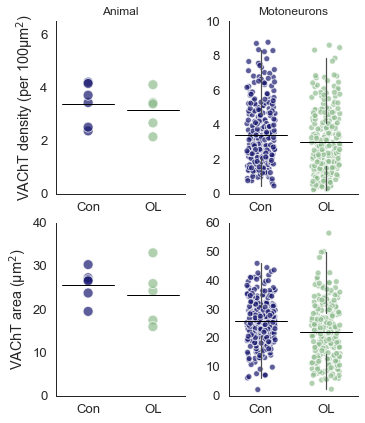

In [544]:
#DENSITY C BOUTON
def two_cond_stripplot1(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    pltn.invert_xaxis() 
    sns.despine()
    #pltn.set_xticklabels(labels1)
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
#Medial 
#labels1=['','']
##two_cond_stripplot1(0,0, 0.2, 0.5,'Condition','density_100',10,None,0.7,1,'darkseagreen','midnightblue',CBout_Med_only,0,"White",0,6.5,'C bouton density (per 100\u03BCm$^2$)','','Medial',12,1,False)
#Lateal

##two_cond_stripplot1(0.3,0, 0.2, 0.5,'Condition','density_100',10,None,0.7,1,'darkseagreen','midnightblue',CBout_Lat_only,0,"White",0,6.5,'','','Lateral',12,1,False)

#Entire EDL
labels1=['OL','Con']

two_cond_stripplot1(0.6,0, 0.3, 0.6,'Condition','density_100',10,None,0.7,1,'darkseagreen','midnightblue',OL_Cbouton_grouped2,0,"White",0,6.5,'VAChT density (per 100\u03BCm$^2$)','','Animal',12,1,False)

two_cond_stripplot2(1,0, 0.3, 0.6,'Condition','Vacht_den',6,None,0.7,1,'darkseagreen','midnightblue',Overload_CBouton3,0.22,"White",0,10,'','','Motoneurons',12,1,False)

#########################################################################################
#AREA C BOUTON
# Medial 
labels1=['OL','Con']
#two_cond_stripplot1(0,-0.6, 0.2, 0.5,'Condition','VACHT_Area',10,None,0.7,1,'darkseagreen','midnightblue',CBout_Med_only,0,"White",0,40,'Mean C bouton area (\u03BCm$^2$)','','',12,1,False)

#Lateal
#two_cond_stripplot1(0.3,-0.6, 0.2, 0.5,'Condition','VACHT_Area',10,None,0.7,1,'darkseagreen','midnightblue',CBout_Lat_only,0,"White",0,40,'','','',12,1,False)

#Entire EDL
two_cond_stripplot1(0.6,-0.7, 0.3, 0.6,'Condition','VACHT_Area',10,None,0.7,1,'darkseagreen','midnightblue',OL_Cbouton_grouped2,0,"White",0,40,'VAChT area (\u03BCm$^2$)','','',12,1,False)


#Entire EDL
#DENSITY C BOUTON
def two_cond_stripplot2(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    pltn.invert_xaxis() 
    sns.despine()
    #pltn.set_xticklabels(labels1)
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
#Medial 
two_cond_stripplot2(1,-0.7, 0.3, 0.6,'Condition','VAChT Area (Average per Cell)',6,None,0.7,1,'darkseagreen','midnightblue',Overload_CBouton3,0.22,"White",0,60,'','','',12,1,False)

plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\C_Bouton_Fig_Nov.png', dpi= 300, bbox_inches = 'tight')



In [103]:
OL_Cbouton_grouped2.head()

,Animal #,Condition,VACHT_Area,VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,Vacht_density,Vacht_den,area_100,density_100
0,Leeds 1,OVERLOAD,24.212097,637.866452,7869.611811,8.695607,7.685161,25.129032,0.003437,3.437493,2421.209677,3.437493
1,Leeds 11,OVERLOAD,25.922909,545.567636,6521.843868,8.653905,7.951636,21.454545,0.003385,3.384854,2592.290909,3.384854
2,Leeds 12,OVERLOAD,33.032963,971.610370,7874.906656,13.403518,12.010370,30.629630,0.004109,4.108530,3303.296296,4.108530
3,Leeds 15,CONTROL,27.252941,999.048824,11408.605319,9.739292,9.157059,35.705882,0.003435,3.434672,2725.294118,3.434672
4,Leeds 16,CONTROL,19.470233,340.382326,7320.099082,4.620893,4.774419,17.279070,0.002369,2.369090,1947.023256,2.369090


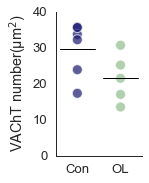

In [126]:
two_cond_stripplot1(0.6,-0.7, 0.2, 0.5,'Condition','VAChT_Number',10,None,0.7,1,'darkseagreen','midnightblue',OL_Cbouton_grouped2,0,"White",0,40,'VAChT number(\u03BCm$^2$)','','',12,1,False)

 ## STATS: C bouton

 ### C bouton density: Control vs overload in medial only, lateral only and entire EDL

 #### Shapiro wilks normality tests

In [214]:
Shap_normality(OL_Cbouton_grouped2,'density_100','control only medial vs lateral')  
Shap_normality(OL_Cbouton_grouped2,'VACHT_Area','control only medial vs lateral')  
Shap_normality(OL_Cbouton_grouped2,'VAChT Number','control only medial vs lateral')  


control only medial vs lateral
Size=0.906, p=0.217
normally distributed:use parametric
control only medial vs lateral
Size=0.956, p=0.720
normally distributed:use parametric


KeyError: 'VAChT Number'

 #### T tests for Vacht density

In [215]:
df=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'OVERLOAD'].density_100
df1=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'CONTROL'].density_100

T_Test(df,df1,'control','overload','vacht density has ', ' MNs-con and OL ')


T test: control vs overload for vacht density has 
Statistics=-0.525, p=0.612267910268901
vacht density has  has the same distribution between control and overload in  MNs-con and OL (fail to reject H0)


In [190]:
rp.summary_cont(OL_Cbouton_grouped2.groupby("Condition")['density_100'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,3.397532,0.795830,0.324896,2.699957,4.095108
OVERLOAD,5,3.149996,0.756627,0.338374,2.408502,3.891491


In [220]:
rp.summary_cont(Overload_CBouton3.groupby("Condition")['Vacht_den'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,289,3.422158,1.810577,0.106505,3.213047,3.631269
OVERLOAD,259,3.024699,2.117496,0.131575,2.766313,3.283085


In [221]:
df=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'OVERLOAD'].VACHT_Area
df1=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'CONTROL'].VACHT_Area

T_Test(df,df1,'control','overload','vacht area has ', ' MNs-con and OL ')


T test: control vs overload for vacht area has 
Statistics=-0.730, p=0.483892767448891
vacht area has  has the same distribution between control and overload in  MNs-con and OL (fail to reject H0)


In [222]:
rp.summary_cont(OL_Cbouton_grouped2.groupby("Condition")['VACHT_Area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,25.681540,3.693173,1.507732,22.444331,28.918749
OVERLOAD,5,23.308978,6.910120,3.090299,16.537061,30.080896


In [127]:
df=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'OVERLOAD'].VAChT_Number
df1=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'CONTROL'].VAChT_Number

T_Test(df,df1,'control','overload','vacht area has ', ' MNs-con and OL ')

T test: control vs overload for vacht area has 
Statistics=-1.882, p=0.092533733112193
vacht area has  has the same distribution between control and overload in  MNs-con and OL (fail to reject H0)


 #### Stats for C bouton area

 Shapiro wilks test for normality

 # Kv2.1 data analyses

In [37]:
KV2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\\Overload_Python_Analysis1\Kv2.1 Data.xlsx", sheet_name='Compartment')



In [587]:
KV2.head()


,Condition,Animal_no,Cell_no,Kv2.1 Total Area (Average per Cell),Kv2.1 Total Volume (Average per Cell),Kv2density,Kv2.1 Co Number/Kv2.1 Total Number,Compartment,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,OVERLOAD,Leeds 1,1,1.82,0.18,0.457107,61.538462,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OVERLOAD,Leeds 1,2,1.79,0.17,0.029360,66.666667,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OVERLOAD,Leeds 1,3,1.80,0.20,0.422020,96.296296,LATERAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
3,OVERLOAD,Leeds 1,4,1.22,0.13,2.628583,48.125000,LATERAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OVERLOAD,Leeds 1,5,1.59,0.15,0.221792,5.000000,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
KV2_clean=KV2.drop(KV2[KV2['Kv2density']<=0.1].index) # dropping cells with extremely low density(likely to be gamma MNs)
KV2_clean1=KV2_clean.drop(KV2_clean[KV2_clean['Kv2.1 Co Number/Kv2.1 Total Number']<=1].index) # dropping cells with no colocalisation between Kv2.1 and vacht)
KV2_clean3=KV2_clean.rename(columns={'Kv2density': 'KV2_density', 'Kv2.1 Total Area (Average per Cell)': 'KV2_Area', 'Kv2.1 Co Number/Kv2.1 Total Number': 'KV2_coloc' })

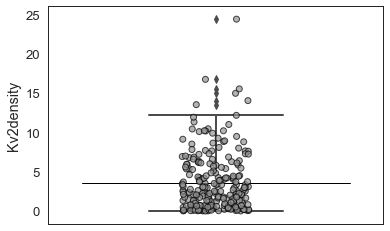

In [39]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')
sns.boxplot(y='Kv2density' ,data=KV2, medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=True,showfliers=True,showmeans=True, showbox=False,linewidth=2)
sns.stripplot(y='Kv2density' ,s=6,alpha=0.7,linewidth=1, palette='Greys',
                   data=KV2,
                   jitter=0.1
                   
                   , edgecolor='black')

 #### cells lying outside of whiskers (3 sd from the mean) were re-assessed for abnormal staining/ quality
 The following cells were identified as low quality and removed by the code in the cell below. 
 Animal 24, cell 17
 Animal 20, cell 17
 Animal 11, cells 5 and 12 



In [87]:
KV2clean4=KV2_clean3.drop(KV2_clean3[(KV2_clean3['Animal_no'] == 'Leeds 16') & (KV2_clean3['Cell_no'] == 17)].index)
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 20') & (KV2clean4['Cell_no'] == 17)].index)    #dropping cell 17 from Leeds 20
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 11') & (KV2clean4['Cell_no'] == 5)].index)     #dropping cell 5 from Leeds 11
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 11') & (KV2clean4['Cell_no'] == 12)].index)    #dropping cell 12 from Leeds 11


#### Grouping cells by animal and condition for plotting and stats.

In [88]:
kv2clean_grouped=KV2clean4.groupby(['Animal_no', 'Condition'],as_index=False).mean()


In [42]:
kv2clean_grouped


,Animal_no,Condition,KV2_Area,Kv2.1 Total Volume (Average per Cell),KV2_density,KV2_coloc,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Leeds 1,OVERLOAD,2.087083,0.255000,1.913674,27.699193,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
1,Leeds 11,OVERLOAD,3.389000,0.526000,2.792943,29.297369,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leeds 12,OVERLOAD,3.867333,0.646667,4.364962,12.651382,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Leeds 15,CONTROL,3.483077,0.607692,3.458583,17.694624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leeds 16,CONTROL,2.425000,0.275000,3.504322,9.318811,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Leeds 17,CONTROL,3.188462,0.481923,3.136636,22.353694,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Leeds 18,CONTROL,3.028929,0.476429,6.213035,6.125804,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Leeds 2,OVERLOAD,3.258824,0.431765,1.412688,30.995883,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Leeds 20,CONTROL,2.849643,0.455714,4.188599,15.192060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Leeds 21,CONTROL,2.951923,0.872692,4.329718,28.213164,NaN,NaN,NaN,3.655356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importing macro and micro cluster data

In [12]:

df_KV2atCbouton_OL= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_OVERLOAD_Maccroonly.xlsx", sheet_name='all')
df_KV2atCbouton_control=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_control_Maccroonly.xlsx", sheet_name='all')


In [13]:
df_KV2awayfromCbouton_Control= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_control_MICroonly.xlsx", sheet_name='all')

df_KV2awayfromCbouton_OL=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_OVERLOAD_MICcroonly.xlsx", sheet_name='all')


away    19291
Name: location, dtype: int64

In [14]:
#ccreating joint DF with all micro cluster data for both control and overload conditions
framesCbout=[df_KV2atCbouton_OL,df_KV2atCbouton_control]
All_Cbout=pd.concat(framesCbout)

#All_Macro=All_Macro.drop(All_Macro[All_Macro['Surface_area']< 11].index)

All_Cbout=All_Cbout.dropna()


In [622]:
All_Cbout

,Condition,Compartment,Animal,Cell,Surface_area,Cell_area,location
0,OVERLOAD,MEDIAL,Leeds 1,1,1.453600,11375.900391,at
1,OVERLOAD,MEDIAL,Leeds 1,1,1.258870,11375.900391,at
2,OVERLOAD,MEDIAL,Leeds 1,1,0.852119,11375.900391,at
3,OVERLOAD,MEDIAL,Leeds 1,1,1.360660,11375.900391,at
4,OVERLOAD,MEDIAL,Leeds 1,1,1.384470,11375.900391,at
...,...,...,...,...,...,...,...
4782,CONTROL,MEDIAL,Leeds 21,32,13.547200,6894.570000,at
4783,CONTROL,MEDIAL,Leeds 21,32,12.324100,6894.570000,at
4784,CONTROL,MEDIAL,Leeds 21,32,32.055599,6894.570000,at
4785,CONTROL,MEDIAL,Leeds 21,32,19.648399,6894.570000,at


In [15]:
#ccreating joint DF with all micro cluster data for both control and overload conditions
frames=[df_KV2awayfromCbouton_OL,df_KV2awayfromCbouton_Control]
All_away=pd.concat(frames)

#All_Micro=All_Micro.drop(All_Micro[All_Micro['Surface_area']> 11].index)


In [16]:
frames=[All_away,All_Cbout]
All_All=pd.concat(frames)
All_All=All_All.dropna()


In [17]:
#All_All.iloc[All_All.Surface_area <= 11, 'Size'] = 'micro' 
#All_All.iloc[All_All.Surface_area >= 11, 'Size'] = 'macro'
conditions= [(All_All['Surface_area'] < 6), (All_All['Surface_area'] > 6)]
labels=['micro','macro']
All_All['Size'] = np.select(conditions, labels)

In [18]:
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 16') & (All_All['Cell'] == 17)].index)
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 20') & (All_All['Cell'] == 17)].index)    #dropping cell 17 from Leeds 20
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 11') & (All_All['Cell'] == 5)].index)     #dropping cell 5 from Leeds 11
                                                                                                 #dropping cell 12 from Leeds 11
#cells dropped fro poor image quality

In [109]:
All_All

,Condition,Compartment,Animal,Cell,Surface_area,Cell_area,location,Size
0,OVERLOAD,MEDIAL,Leeds 1,1,1.463190,11375.900391,away,micro
1,OVERLOAD,MEDIAL,Leeds 1,1,0.471131,11375.900391,away,micro
2,OVERLOAD,MEDIAL,Leeds 1,1,1.548640,11375.900391,away,micro
3,OVERLOAD,MEDIAL,Leeds 1,1,1.406140,11375.900391,away,micro
4,OVERLOAD,MEDIAL,Leeds 1,1,0.699855,11375.900391,away,micro
...,...,...,...,...,...,...,...,...
4782,CONTROL,MEDIAL,Leeds 21,32,13.547200,6894.570000,at,macro
4783,CONTROL,MEDIAL,Leeds 21,32,12.324100,6894.570000,at,macro
4784,CONTROL,MEDIAL,Leeds 21,32,32.055599,6894.570000,at,macro
4785,CONTROL,MEDIAL,Leeds 21,32,19.648399,6894.570000,at,macro


In [19]:
all_density=All_All.groupby(['Condition', 'Animal','Cell','location'],as_index=False).count()


In [135]:
all_density

,Condition,Animal,Cell,location,Compartment,Surface_area,Cell_area,Size
0,CONTROL,Leeds 15,1,at,43,43,43,43
1,CONTROL,Leeds 15,1,away,784,784,784,784
2,CONTROL,Leeds 15,2,at,17,17,17,17
3,CONTROL,Leeds 15,2,away,522,522,522,522
4,CONTROL,Leeds 15,3,at,47,47,47,47
...,...,...,...,...,...,...,...,...
465,OVERLOAD,Leeds 3,11b,away,6,6,6,6
466,OVERLOAD,Leeds 3,12a,at,6,6,6,6
467,OVERLOAD,Leeds 3,12a,away,16,16,16,16
468,OVERLOAD,Leeds 3,12b,at,11,11,11,11


In [20]:
all_area=All_All.groupby(['Condition', 'Animal','Cell','location' ],as_index=False).mean()

In [134]:
all_area

,Condition,Animal,Cell,location,Surface_area,Cell_area
0,CONTROL,Leeds 15,1,at,18.613191,10399.400391
1,CONTROL,Leeds 15,1,away,2.743601,10399.400391
2,CONTROL,Leeds 15,2,at,27.280785,11806.300000
3,CONTROL,Leeds 15,2,away,3.048265,11806.300000
4,CONTROL,Leeds 15,3,at,29.003936,10776.100000
...,...,...,...,...,...,...
465,OVERLOAD,Leeds 3,11b,away,1.514976,2871.250000
466,OVERLOAD,Leeds 3,12a,at,5.598294,5308.620000
467,OVERLOAD,Leeds 3,12a,away,3.681940,5308.620000
468,OVERLOAD,Leeds 3,12b,at,3.283914,6130.390137


In [21]:
Kv_count_col=all_density['Size']
DF_kv_density=pd.concat([all_area,Kv_count_col], axis=1)
DF_kv_density['density']=(DF_kv_density['Size'] / DF_kv_density['Cell_area']) *100 
DF_kv_density=DF_kv_density.drop(DF_kv_density[DF_kv_density['density']<=0.1].index)
DF_kv_density=DF_kv_density.drop(DF_kv_density[DF_kv_density['density']>15].index) #outside 3stdv from mean

In [22]:
DF_kv_density_grouped=DF_kv_density.groupby(['Animal','Condition','Size', 'location'],as_index=False).mean()

In [160]:
DF_kv_density_grouped

,Animal,Condition,Size,location,Surface_area,Cell_area,density
0,Leeds 1,OVERLOAD,7,at,2.736438,6231.359863,0.112335
1,Leeds 1,OVERLOAD,8,at,13.524269,3089.649902,0.258929
2,Leeds 1,OVERLOAD,9,at,5.773178,3355.830078,0.268190
3,Leeds 1,OVERLOAD,10,at,14.232633,9017.440430,0.110896
4,Leeds 1,OVERLOAD,11,away,2.052911,6231.359863,0.176526
...,...,...,...,...,...,...,...
383,Leeds 3,OVERLOAD,30,away,3.220762,6130.390137,0.489365
384,Leeds 3,OVERLOAD,43,away,2.016024,6133.150000,0.701108
385,Leeds 3,OVERLOAD,44,away,2.598636,4324.810059,1.017386
386,Leeds 3,OVERLOAD,47,away,5.722917,7637.930176,0.615350


In [23]:
DF_kv_density_CBOUT_grouped=DF_kv_density_grouped.drop(DF_kv_density_grouped[DF_kv_density_grouped['location']=='away'].index)
DF_kv_density_CBOUT_grouped1=DF_kv_density_CBOUT_grouped.groupby(['Condition', 'Animal'],as_index=False).mean()

DF_kv_density_NON_CBOUT_grouped=DF_kv_density_grouped.drop(DF_kv_density_grouped[DF_kv_density_grouped['location']=='at'].index)
DF_kv_density_NON_CBOUT_grouped1=DF_kv_density_NON_CBOUT_grouped.groupby(['Condition', 'Animal'],as_index=False).mean()

In [162]:
DF_kv_density_NON_CBOUT_grouped1

,Condition,Animal,Size,Surface_area,Cell_area,density
0,CONTROL,Leeds 15,358.923077,3.459381,10329.807647,3.384654
1,CONTROL,Leeds 16,256.647059,2.409220,6780.264690,3.991472
2,CONTROL,Leeds 17,273.750000,3.176247,8008.500278,3.239433
3,CONTROL,Leeds 18,529.678571,3.029229,8720.167548,6.213206
4,CONTROL,Leeds 20,356.785714,2.849397,9071.055336,4.188599
5,CONTROL,Leeds 21,330.240000,2.973027,7920.232412,3.980278
6,OVERLOAD,Leeds 1,116.166667,2.066040,7843.293809,1.832884
7,OVERLOAD,Leeds 11,442.000000,3.119720,7584.859562,6.324806
8,OVERLOAD,Leeds 12,376.529412,3.687377,7842.648199,4.353584
9,OVERLOAD,Leeds 2,86.812500,3.089873,6212.597186,1.448531


In [24]:
all_area_NONCBOUT=all_area.drop(all_area[all_area['location']=='at'].index)
all_area_NONCBOUT_grouped=all_area_NONCBOUT.groupby(['Condition', 'Animal'],as_index=False).mean()
all_area_CBOUT=all_area.drop(all_area[all_area['location']=='away'].index)
all_area_CBOUT_grouped=all_area_CBOUT.groupby(['Condition', 'Animal'],as_index=False).mean()


In [152]:
all_area_NONCBOUT_grouped

,Condition,Animal,Surface_area,Cell_area
0,CONTROL,Leeds 15,1.636489,10329.807647
1,CONTROL,Leeds 16,1.434770,6662.403021
2,CONTROL,Leeds 17,1.577132,8232.295735
3,CONTROL,Leeds 18,1.575682,8720.099966
4,CONTROL,Leeds 20,1.571250,9071.055336
5,CONTROL,Leeds 21,1.654778,8011.919627
6,OVERLOAD,Leeds 1,1.530160,8254.218389
7,OVERLOAD,Leeds 11,1.554690,7558.273592
8,OVERLOAD,Leeds 12,1.820495,7842.068321
9,OVERLOAD,Leeds 2,1.796971,6583.118423


In [158]:
DF_kv_density_NON_CBOUT_grouped

,Animal,Condition,Size,location,Surface_area,Cell_area,density
4,Leeds 1,OVERLOAD,11,away,2.052911,6231.359863,0.176526
8,Leeds 1,OVERLOAD,20,away,1.593189,9017.440430,0.221792
14,Leeds 1,OVERLOAD,29,away,2.315338,7754.930176,0.373956
17,Leeds 1,OVERLOAD,34,away,1.974056,5068.950195,0.670750
21,Leeds 1,OVERLOAD,48,away,1.773919,8839.400391,0.543023
...,...,...,...,...,...,...,...
383,Leeds 3,OVERLOAD,30,away,3.220762,6130.390137,0.489365
384,Leeds 3,OVERLOAD,43,away,2.016024,6133.150000,0.701108
385,Leeds 3,OVERLOAD,44,away,2.598636,4324.810059,1.017386
386,Leeds 3,OVERLOAD,47,away,5.722917,7637.930176,0.615350


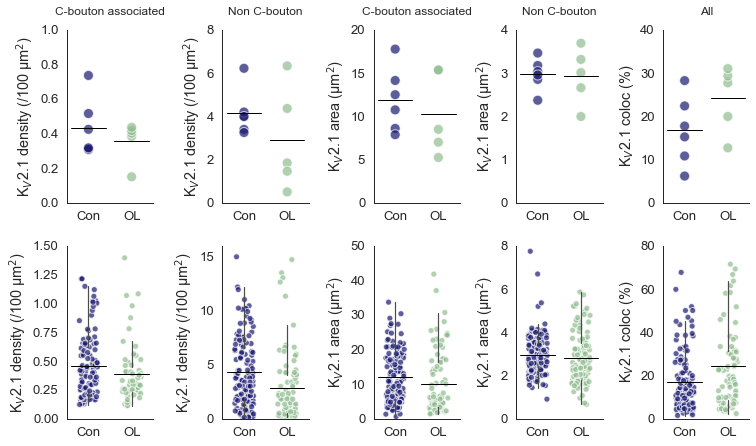

In [99]:
# all Density
labels1=['Con','OL']
def two_cond_stripplot1(pltn,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    #pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
two_cond_stripplot1(1,0,0, 0.2, 0.6,'Condition','density',10,None,0.7,1,'midnightblue','darkseagreen',DF_kv_density_CBOUT_grouped1,0,'white',0,1,'K$_V$2.1 density (/100 \u03BCm$^2$)','','C-bouton associated',12,1.05,False)

two_cond_stripplot1(1,0.36,0, 0.2, 0.6,'Condition','density',10,None,0.7,1,'midnightblue','darkseagreen',DF_kv_density_NON_CBOUT_grouped1,0,'white',0,8,'K$_V$2.1 density (/100 \u03BCm$^2$)','','Non C-bouton',12,1.05,False)

labels1=['Con','OL']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    pltM.invert_xaxis() 





labels1=['Con','OL']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    #pltM.invert_xaxis() 

##
labels1=['Con','OL']
two_cond_stripplot1(1,0.71,0, 0.2, 0.6,'Condition','Surface_area',10,None,0.7,1,'midnightblue','darkseagreen',all_area_CBOUT_grouped,0,'white',0,20,'K$_V$2.1 area (\u03BCm$^2$)','','C-bouton associated',12,1.05,False)

two_cond_stripplot1(1,1.04,0, 0.2, 0.6,'Condition','Surface_area',10,None,0.7,1,'midnightblue','darkseagreen',all_area_NONCBOUT_grouped,0,'white',0,4,'K$_V$2.1 area (\u03BCm$^2$)','','Non C-bouton',12,1.05,False)




two_cond_stripplot2(1,1.04,-0.75, 0.2, 0.6,'Condition','Surface_area',6,None,0.7,1,'midnightblue','darkseagreen',all_area_NONCBOUT,0.22,'white',0,8,'K$_V$2.1 area (\u03BCm$^2$)','','',12,1,False)

two_cond_stripplot2(1,0.71,-0.75, 0.2, 0.6,'Condition','Surface_area',6,None,0.7,1,'midnightblue','darkseagreen',all_area_CBOUT,0.22,'white',0,50,'K$_V$2.1 area (\u03BCm$^2$)','','',12,1,False)



labels1=['OL','Con']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    pltM.invert_xaxis() 

labels1=['OL','Con']
two_cond_stripplot2(1,0,-0.75, 0.2, 0.6,'Condition','density',6,None,0.7,1,'darkseagreen','midnightblue',DF_kv_density_CBOUT_grouped,0.22,'white',0,1.5,'K$_V$2.1 density (/100 \u03BCm$^2$)','','',12,1,False)
two_cond_stripplot2(1,0.36,-0.75, 0.2, 0.6,'Condition','density',6,None,0.7,1,'darkseagreen','midnightblue',DF_kv_density_NON_CBOUT_grouped,0.22,'white',0,16,'K$_V$2.1 density (/100 \u03BCm$^2$)','','',12,1,False)

labels1=['OL','Con']
two_cond_stripplot2(1,1.38,-0.75, 0.2, 0.6,'Condition','KV2_coloc',6,None,0.7,1,'darkseagreen','midnightblue',KV2clean4,0.22,'white',0,80,'K$_V$2.1 coloc (%)','','',12,1,False)

def two_cond_stripplot1(pltn,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()

labels1=['OL','Con']

two_cond_stripplot1(1,1.38,0, 0.2, 0.6,'Condition','KV2_coloc',10,None,0.7,1,'darkseagreen','midnightblue',kv2clean_grouped,0,'white',0,40,'K$_V$2.1 coloc (%)','','All',12,1.05,False)

plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\KV_Fig_Jan_2020.png', dpi= 300, bbox_inches = 'tight')



 ### Kv2.1 density Stats: Whole EDL Control vs Overload

 #### Testing normality for Kv2.1 density and area in control vs overload

In [198]:
Shap_normality(DF_kv_density_CBOUT_grouped1,'density','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 density
Size=0.916, p=0.289
normally distributed:use parametric


In [199]:
#Kv2.1 density T test
DF=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='OVERLOAD'].index)
DF1=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='CONTROL'].index)
T_Test(DF.density,DF1.density,'Control','Overload','Kv2.1 macro Density','Entire EDL')

T test: Control vs Overload for Kv2.1 macro Density
Statistics=0.854, p=0.415069763903642
Kv2.1 macro Density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [200]:
rp.summary_cont(DF_kv_density_CBOUT_grouped1.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,0.433902,0.169480,0.069190,0.285346,0.582458
OVERLOAD,5,0.356943,0.117844,0.052701,0.241456,0.472430


In [201]:
Shap_normality(DF_kv_density_NON_CBOUT_grouped,'density','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.888, p=0.000
Not normally distributed: use non-parametric


In [212]:
#Kv2.1 micro cluster density test
DF=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'CONTROL'].density
DF1=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'OVERLOAD'].density
ManWhitney(DF,DF1,'CONTROL','OVERLOAD', 'density', 'Control vs overload')

Mann WhitneyU: CONTROL vs OVERLOAD for density
Statistics=11.000, p=0.261408326959544
density has same distribution between CONTROL and OVERLOAD in Control vs overload(fail to reject H0)


In [209]:
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped1.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,4.166274,1.070098,0.436866,3.228292,5.104255
OVERLOAD,5,2.890003,2.392399,1.069913,0.545452,5.234554


In [221]:
# cell numbers
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,135,4.298958,3.178365,0.273550,3.760803,4.837114
OVERLOAD,85,2.783375,3.275768,0.355307,2.082840,3.483910


### Macro-cluster area

In [213]:
Shap_normality(DF_kv_density_CBOUT_grouped1,'Surface_area','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.957, p=0.733
normally distributed:use parametric


In [214]:
#Kv2.1 Macro area test

DF=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='OVERLOAD'].index)
DF1=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='CONTROL'].index)
T_Test(DF.Surface_area,DF1.Surface_area,'Control','Overload','Kv2.1 macro Density','Entire EDL')


T test: Control vs Overload for Kv2.1 macro Density
Statistics=0.870, p=0.406912668503255
Kv2.1 macro Density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [215]:
rp.summary_cont(DF_kv_density_CBOUT_grouped1.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,12.417139,3.499329,1.428595,9.349842,15.484437
OVERLOAD,5,10.069379,5.420490,2.424117,4.757299,15.381460


In [220]:
# cell numbers
rp.summary_cont(DF_kv_density_CBOUT_grouped.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,110,12.398947,6.935928,0.661315,11.096838,13.701057
OVERLOAD,58,10.433828,8.460175,1.110875,8.237496,12.630160


### Micro-cluster Surface area

In [216]:
Shap_normality(DF_kv_density_NON_CBOUT_grouped,'Surface_area','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.938, p=0.000
Not normally distributed: use non-parametric


In [217]:
#Kv2.1 micro cluster Area test
DF=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'CONTROL'].density
DF1=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'OVERLOAD'].density
ManWhitney(DF,DF1,'CONTROL','OVERLOAD', 'Surface_area', 'Control vs overload')

Mann WhitneyU: CONTROL vs OVERLOAD for Surface_area
Statistics=11.000, p=0.261408326959544
Surface_area has same distribution between CONTROL and OVERLOAD in Control vs overload(fail to reject H0)


In [218]:
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped1.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,2.982750,0.350312,0.143014,2.675688,3.289812
OVERLOAD,5,2.921835,0.604531,0.270354,2.329395,3.514275


In [219]:
# cell numbers
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,135,2.971006,0.910713,0.078382,2.816806,3.125206
OVERLOAD,85,2.852126,1.047271,0.113592,2.628164,3.076089


In [90]:
Shap_normality(kv2clean_grouped,'KV2_coloc','Control vs OL for Kv2 coloc percentage')       # testing normality for Area

Control vs OL for Kv2 coloc percentage
Size=0.944, p=0.572
normally distributed:use parametric


In [91]:
# cell numbers
rp.summary_cont(kv2clean_grouped.groupby("Condition")['KV2_coloc'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,16.725056,7.934020,3.239050,9.770582,23.679531
OVERLOAD,5,24.111859,7.682781,3.435844,16.582734,31.640984


In [92]:
#Kv2.1 coloc %
DF=kv2clean_grouped.drop(kv2clean_grouped[kv2clean_grouped['Condition']=='OVERLOAD'].index)
DF1=kv2clean_grouped.drop(kv2clean_grouped[kv2clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.KV2_coloc,DF1.KV2_coloc,'Control','Overload','Kv2.1 percent coloc','Entire EDL')


T test: Control vs Overload for Kv2.1 percent coloc
Statistics=-1.559, p=0.153357247627384
Kv2.1 percent coloc has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [93]:
# cell numbers
rp.summary_cont(KV2clean4.groupby("Condition")['KV2_coloc'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,140,16.759411,16.803593,1.420163,13.965897,19.552924
OVERLOAD,79,24.472863,21.232097,2.388798,19.760902,29.184823


 ## SK3 analysis

In [223]:
SK3= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\SK3 Data Jun7.xlsx", sheet_name='Compartments')



In [224]:
SK3_1=SK3.rename(columns={'SK3Co Number/A1':'SK3_density', 'SK3Co Area (Average per Cell)':'SK3_Area' })



In [225]:
# dropping cells with area or density values unlikely to be real signal 
SK3_1_clean1=SK3_1.drop(SK3_1[SK3_1['SK3_Area']<= 1].index)
SK3_1_clean3=SK3_1_clean1.drop(SK3_1_clean1[SK3_1_clean1['SK3_density']<= 0.1].index)



#### grouping by animal and condition for plotting and stats

In [226]:
SK3_1_clean_grouped=SK3_1_clean3.groupby(['Animal #', 'Condition'],as_index=False).mean()




 #### Labeling as SK3 negative or positive
 Based on expected SK3 cluster size range cells with Average SK3 density of less than 0.001/um are excluded

In [227]:
SK3_1.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,58,0.052766,0.026594,0.003492,0.045862,0.059670
pos,227,0.450165,0.378283,0.025108,0.400846,0.499485


In [ ]:
#### Separating ol data into its own DF

In [228]:
SK3_1_ol=SK3_1.drop(SK3_1[SK3_1['Condition']== 'CONTROL'].index)
SK3_1_ol.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1_ol.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


#### Separating control data into its own DF

In [229]:
SK3_1_con=SK3_1.drop(SK3_1[SK3_1['Condition']== 'OVERLOAD'].index)
SK3_1_con.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1_con.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1_con.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,11,0.053962,0.027707,0.008354,0.036789,0.071136
pos,130,0.450196,0.345110,0.030268,0.390641,0.509751


#### creating joint DF for plotting proportions

In [230]:
propdf1=pd.concat([SK3_1_con, SK3_1_ol], ignore_index=False)




In [231]:
x, y, hue = 'SK3_Expression', "Proportion (positve/negative)", "Condition"
hue_order = ["OVERLOAD", "CONTROL"]


prop_df2 = (SK3_1[x]
           .groupby(SK3_1[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df2 



,Condition,SK3_Expression,Proportion (positve/negative)
0,CONTROL,pos,0.921986
1,CONTROL,neg,0.078014
2,OVERLOAD,pos,0.673611
3,OVERLOAD,neg,0.326389


In [ ]:
d_Con=



In [232]:
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


In [233]:
#finction for defining axes line settings
def Axes_settings(LW,C,Z):
    for axis in ['top','left']:
        ax.spines[axis].set_linewidth(LW)
        ax.spines[axis].set_color(C)
        ax.spines[axis].set_zorder(Z)

#legend settings
def legend_settings(color1,color2):
    custom_lines = [Line2D([0], [0],color=color1, lw=4,markersize=10,
                       markeredgecolor='black', markeredgewidth=2,alpha=1),
                Line2D([0], [0],color=color2, lw=4, markersize=10,
                       markeredgecolor='black', markeredgewidth=2,alpha=1)]

# figure aesthesics
def fig_Aes(FC,XLab,YLab,FntSize1,FntSize2,XTICLAB,XTICKROT):
    ax.set_facecolor(FC)
    ax.set_xticklabels(XLab, fontsize=FntSize1)
    ax.set_ylabel(YLab, fontsize=FntSize2)
    plt.xlabel(XTICLAB)
    plt.xticks(rotation=XTICKROT)



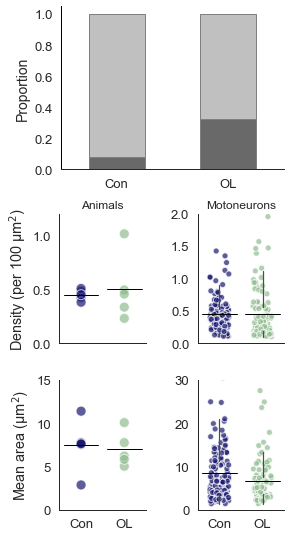

In [240]:
df1 = prop_df2.pivot(columns='SK3_Expression',index='Condition').fillna(0)
#plot it


plt1c=df1.plot(figsize=(4,3),kind='bar',stacked=True,legend=False, color=('dimgrey','silver'), linewidth=1,edgecolor='grey')
ax = plt.gca()
fig_Aes('white',('Con','OL'),'Proportion',13,14,'','horizontal')
Axes_settings(1,'black',0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#legend_settings('dimgrey','silver')
degrees = 0
plt.xticks(rotation=degrees)
#plt1c.legend(custom_lines, ['SK3 -', 'SK3 +'],frameon=False, loc=1,bbox_to_anchor=(1.3, 0.1, 0, 1),fontsize=12)

labels1=['','']
two_cond_stripplot1(1,0.12,-0.68, 0.3, 0.6,'Condition','SK3_density',10,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean_grouped,0,'white',0,1.2,'Density (per 100 \u03BCm$^2$)','','Animals',12,1,False)

two_cond_stripplot2(2,0.6,-0.68, 0.3, 0.6,'Condition','SK3_density',6,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean3,0.22,'white',0,2,'','','Motoneurons',12,1,False)

labels1=['OL','Con']
two_cond_stripplot1(3,0.12,-1.45, 0.3, 0.6,'Condition','SK3_Area',10,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean_grouped,0,'white',0,15,'Mean area (\u03BCm$^2$)','','',12,1,False)

two_cond_stripplot2(4,0.6,-1.45, 0.3, 0.6,'Condition','SK3_Area',6,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean3,0.22,'white',0,30,'','','',12,1,False)


plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\SK3_21.png', dpi= 300, bbox_inches = 'tight')


 ## SK3 Stats

 ### Stats the 2 proportion z test
 W have two groups :

 Group A= Control: n = N1
 Group B= Overload: n = N2
 The number of SK3 positive cells in each group is as follow:

 Group A with lung cancer: n = N1, xx1 positive, pA=xx1/N1=A1
 Group B, healthy individuals: n = N2, xx2 positive, pB=xx2/N1=A2
 In this setting:

 The overall proportion of smokers is p=frac(xx1+xx2)N1+N2=A3
 https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
 count = number of positve cells
 nobs=total number of cells.


In [220]:
# assessing the proportions for control
rp.summary_cont(SK3_1_con.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,11,0.053962,0.027707,0.008354,0.036789,0.071136
pos,130,0.450196,0.345110,0.030268,0.390641,0.509751


In [221]:
#assessing proportions for OL
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


In [225]:
rp.summary_cont(SK3_1.groupby("SK3_Expression")['SK3_density'])

,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,58,0.052766,0.026594,0.003492,0.045862,0.059670
pos,227,0.450165,0.378283,0.025108,0.400846,0.499485


## There is a significant difference between the proportions of SK3 positive to negative cells in control vs overload. 



In [684]:
#performing 2 proportion z test
from statsmodels.stats.proportion import proportions_ztest
count= np.array([47,11])
nobs=np.array([141,144])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.10f}'.format(pval))



0.0000000717


In [230]:
rp.summary_cont(SK3_1_clean_grouped.groupby("Condition")['SK3_Area'])


,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,7.469389,2.715855,1.108743,5.088838,9.849941
OVERLOAD,5,6.959183,1.998020,0.893542,5.001124,8.917242


In [229]:
rp.summary_cont(SK3_1_clean_grouped.groupby("Condition")['SK3_density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,0.447105,0.044192,0.018042,0.408369,0.485842
OVERLOAD,5,0.504676,0.302319,0.135201,0.208403,0.800949


 ### SK3 Density tests

 ### SK3 Density Whole EDL control vs OL

In [231]:
#Shap_normality(SK3_1_clean_grouped_OUTLIER,'SK3_density','Control vs OL for SK3_density')
Shap_normality(SK3_1_clean_grouped,'SK3_Area','Control vs OL for SK3_Area')



Control vs OL for SK3_Area
Size=0.949, p=0.626
normally distributed:use parametric


In [232]:
#SK3 Density
DF=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='OVERLOAD'].index)
DF1=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.SK3_density,DF1.SK3_density,'Control','Overload','SK3_density','Entire EDL')

#SK3 Area
DF=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='OVERLOAD'].index)
DF1=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.SK3_Area,DF1.SK3_Area,'Control','Overload','SK3 Area','Entire EDL')



T test: Control vs Overload for SK3_density
Statistics=-0.466, p=0.652595307261806
SK3_density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)
T test: Control vs Overload for SK3 Area
Statistics=0.348, p=0.736050870994032
SK3 Area has the same distribution between Control and Overload in Entire EDL(fail to reject H0)
